# E-Commerce Insights and Predictions

## 데이터 불러오기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

- Product ID: 각 제품의 고유 ID
- Product Name: 제품의 이름
- Category: 상품의 카테고리(예: 전자제품, 의류, 가정 장식)
- Price: 제품 가격(USD)
- Discount: 제품에 적용되는 할인율
- Tax Rate: 제품에 적용되는 세율
- Stock Level: 재고 수량
- Supplier ID: 제품 공급자의 고유 ID
- Customer Age Group: 제품을 구매한 고객의 연령 그룹
- Customer Location: 고객의 지리적 위치
- Customer Gender: 고객의 성별(예: Male, Female, Non-Binary)
- Shipping Cost: 제품 배송 비용(USD)
- Shipping Method: 배송 방법(예: Standard < Express < Overnight)
- Return Rate: 제품에 대한 반품률
- Seasonality: 특정 계절에 제품의 인기가 집중되는지(yes -> 특정 계절에 인기가 높음 / no -> 연중 고르게 인기가 있음)
- Popularity Index: 제품의 인기도를 나타내는 점수(0~100)

종속 변수: Popularity Index

In [3]:
data = pd.read_csv("C:/Users/Owner/Desktop/2025_DA_Study/data/diversified_ecommerce_dataset.csv")
data.head()

,Product ID,Product Name,Category,Price,Discount,Tax Rate,Stock Level,Supplier ID,Customer Age Group,Customer Location,Customer Gender,Shipping Cost,Shipping Method,Return Rate,Seasonality,Popularity Index
0,P6879,Jacket,Apparel,53.85,5,15,150,S535,35-44,"New York, USA",Male,23.32,Standard,4.49,Yes,56
1,P5132,Camera,Electronics,761.26,10,15,224,S583,25-34,"London, UK",Female,20.88,Overnight,16.11,No,79
2,P2941,Sneakers,Footwear,1756.76,5,8,468,S118,25-34,"Tokyo, Japan",Non-Binary,16.43,Standard,4.93,No,40
3,P8545,Cookbooks,Books,295.24,10,15,25,S104,18-24,"Paris, France",Female,27.49,Standard,1.31,No,93
4,P4594,Camera,Electronics,832.00,10,12,340,S331,55+,"Tokyo, Japan",Male,45.93,Overnight,4.37,No,56


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Product ID          1000000 non-null  object 
 1   Product Name        1000000 non-null  object 
 2   Category            1000000 non-null  object 
 3   Price               1000000 non-null  float64
 4   Discount            1000000 non-null  int64  
 5   Tax Rate            1000000 non-null  int64  
 6   Stock Level         1000000 non-null  int64  
 7   Supplier ID         1000000 non-null  object 
 8   Customer Age Group  1000000 non-null  object 
 9   Customer Location   1000000 non-null  object 
 10  Customer Gender     1000000 non-null  object 
 11  Shipping Cost       1000000 non-null  float64
 12  Shipping Method     1000000 non-null  object 
 13  Return Rate         1000000 non-null  float64
 14  Seasonality         1000000 non-null  object 
 15  Popularity Index

In [4]:
## Customer Age Group: 제품을 자주 구매한 고객의 연령 그룹
# filtered_df = data[data['Product ID'] == 'P6879']
# filtered_df

In [5]:
data.describe() # 수치형 변수의 기술 통계량

,Price,Discount,Tax Rate,Stock Level,Shipping Cost,Return Rate,Popularity Index
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,1005.120742,12.516955,10.002052,250.028536,24.985224,10.492896,49.970211
std,574.451223,8.539929,3.406026,144.676275,14.431730,5.484849,29.164875
min,10.000000,0.000000,5.000000,0.000000,0.000000,1.000000,0.000000
25%,507.860000,5.000000,8.000000,125.000000,12.490000,5.740000,25.000000
50%,1005.430000,15.000000,10.000000,250.000000,24.970000,10.480000,50.000000
75%,1502.310000,20.000000,12.000000,375.000000,37.470000,15.250000,75.000000
max,2000.000000,25.000000,15.000000,500.000000,50.000000,20.000000,100.000000


In [6]:
data.isnull().sum() # 결측치 확인

Product ID            0
Product Name          0
Category              0
Price                 0
Discount              0
Tax Rate              0
Stock Level           0
Supplier ID           0
Customer Age Group    0
Customer Location     0
Customer Gender       0
Shipping Cost         0
Shipping Method       0
Return Rate           0
Seasonality           0
Popularity Index      0
dtype: int64

결측치 없음

In [7]:
columns_to_drop = ['Product ID', 'Product Name', 'Supplier ID']
data = data.drop(columns=columns_to_drop)

## EDA

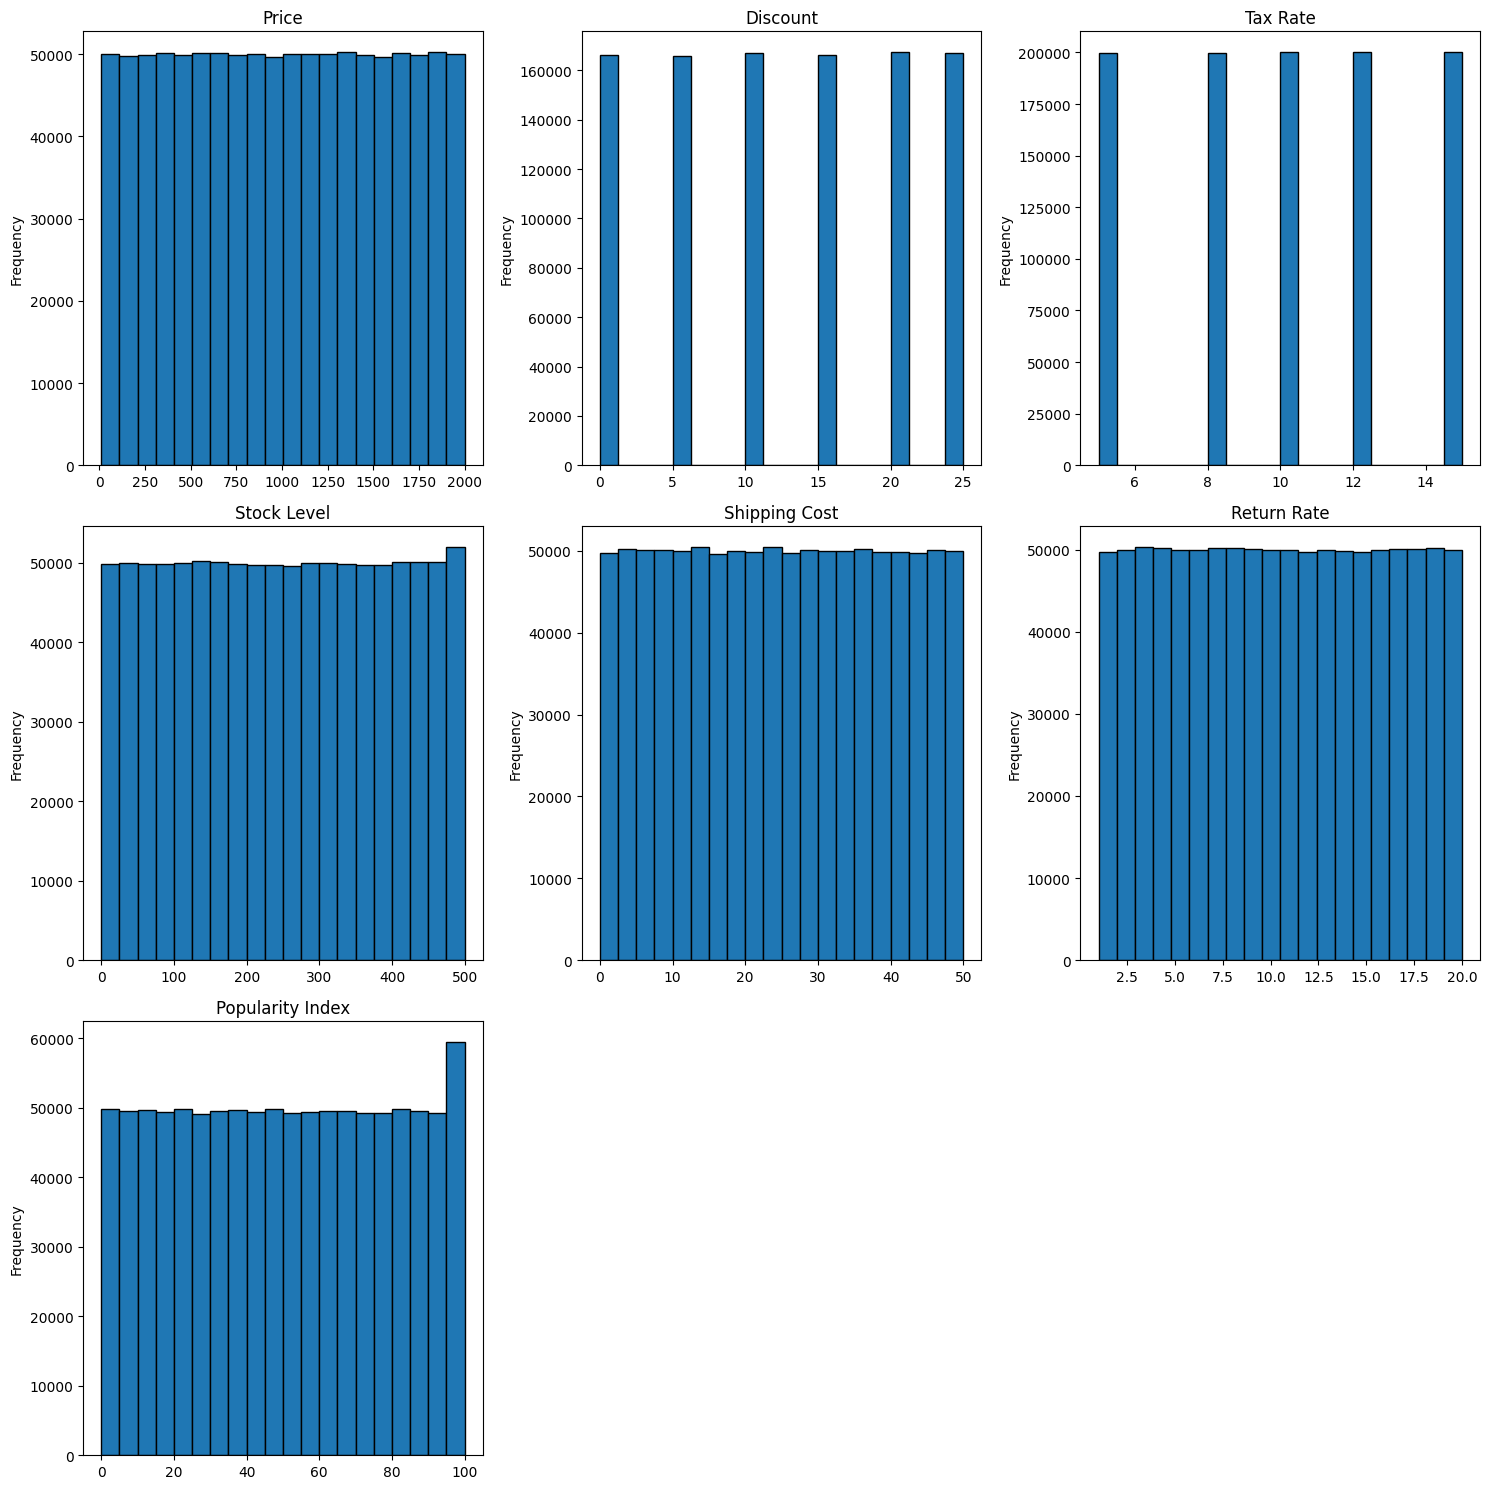

In [8]:
# 수치형 변수 추출
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# 각 수치형 변수에 대해 히스토그램을 시각화
plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot((len(numerical_columns) + 2) // 3, 3, i)
    plt.hist(data[col].dropna(), bins=20, edgecolor='black')
    plt.title(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

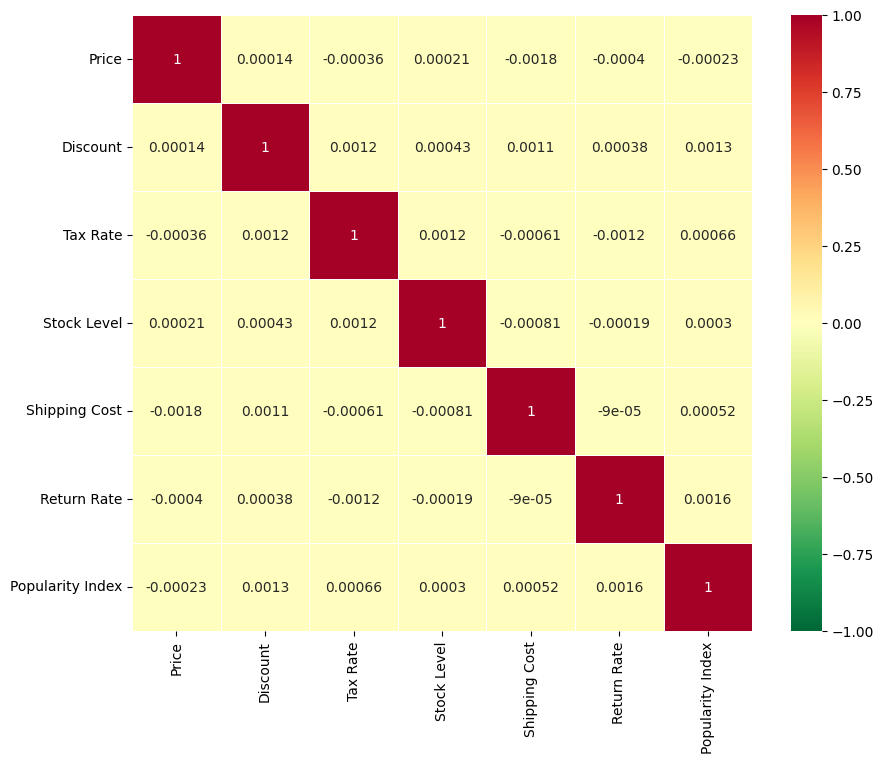

In [9]:
# 히트맵
data_num = data[numerical_columns]
corr = data_num.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='RdYlGn_r', vmin=-1, vmax=1, linewidths=0.5)
plt.show()

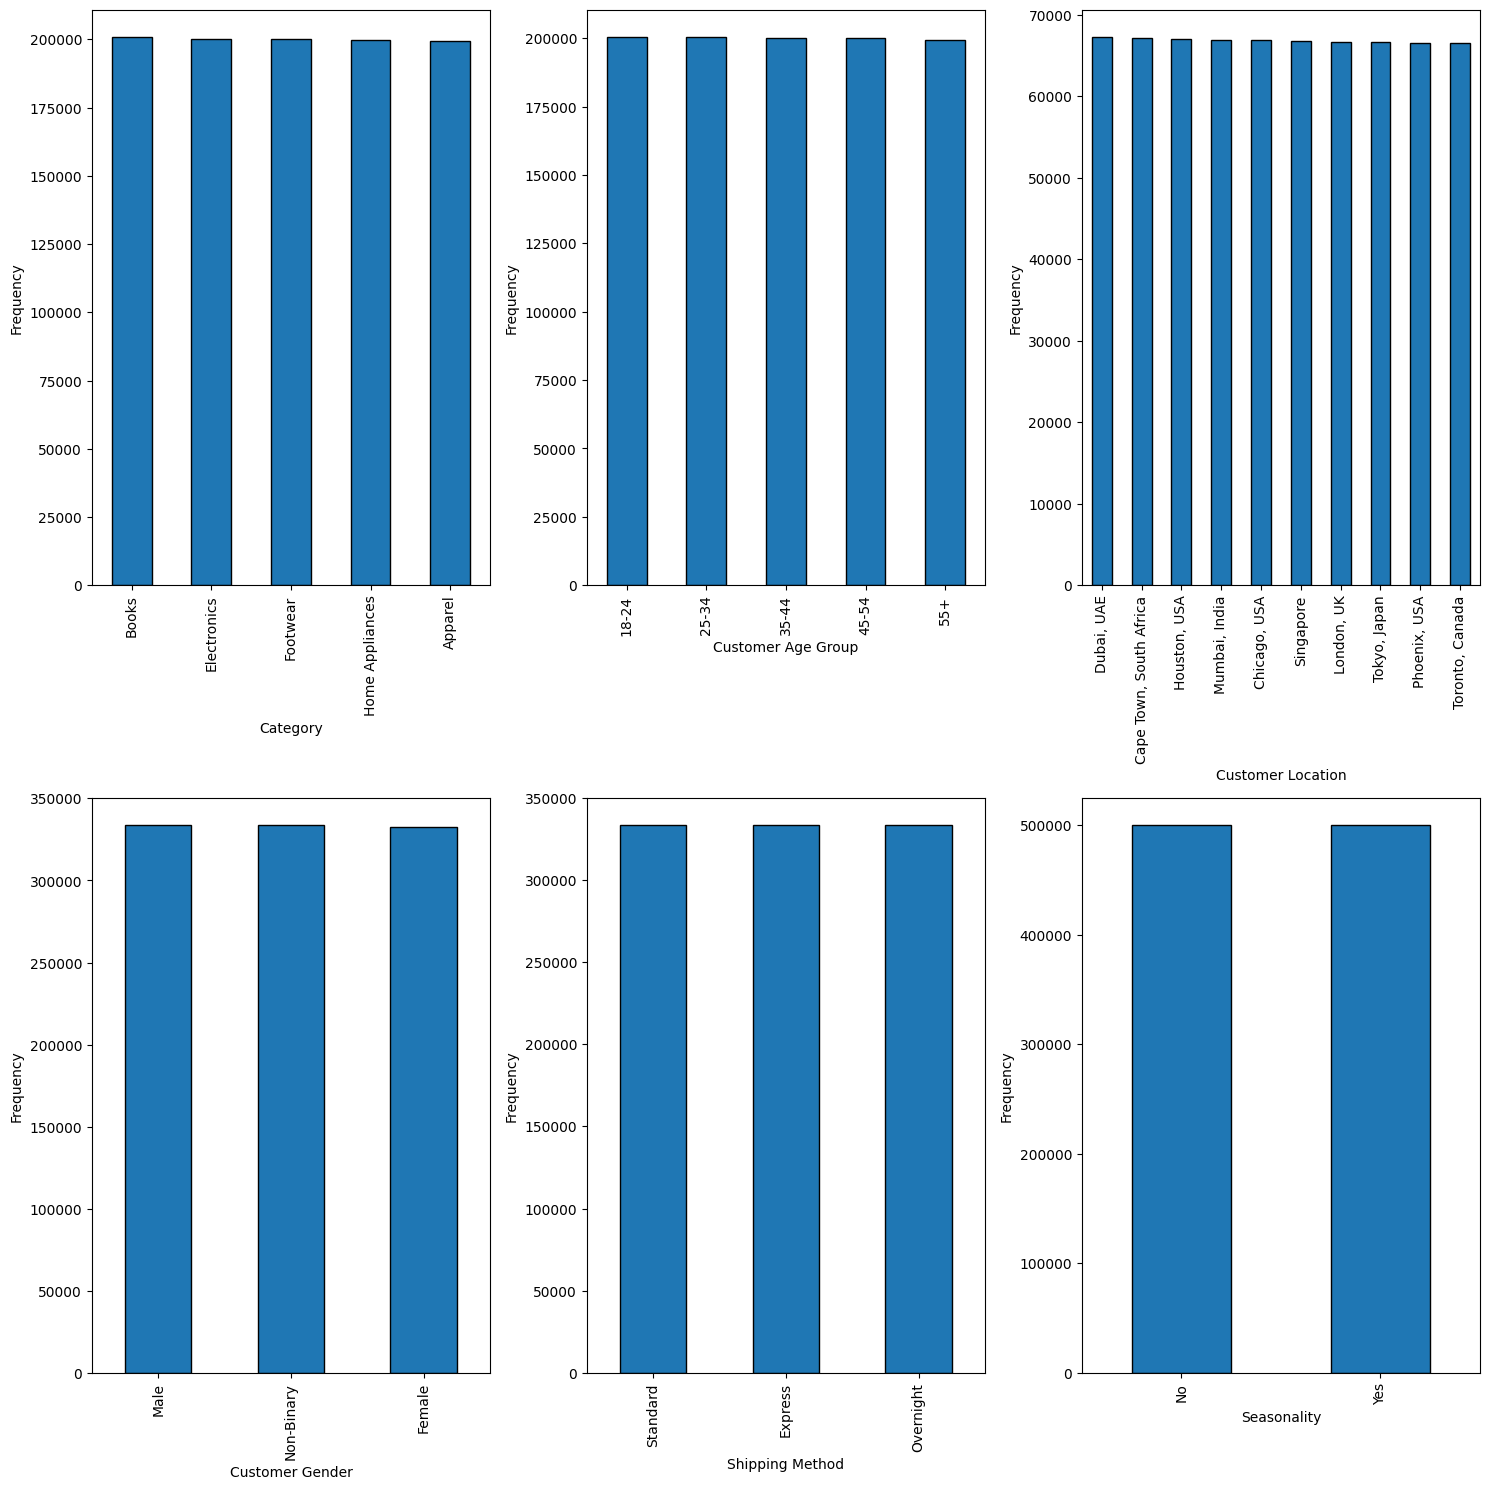

In [10]:
# 범주형 변수 추출
categorical_columns = data.select_dtypes(include=['object']).columns

# 각 범주형 변수의 상위 10개 카테고리 분포를 시각화
plt.figure(figsize=(15, 15))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot((len(categorical_columns) + 2) // 3, 3, i)
    data[col].value_counts().head(10).plot(kind='bar', edgecolor='black')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

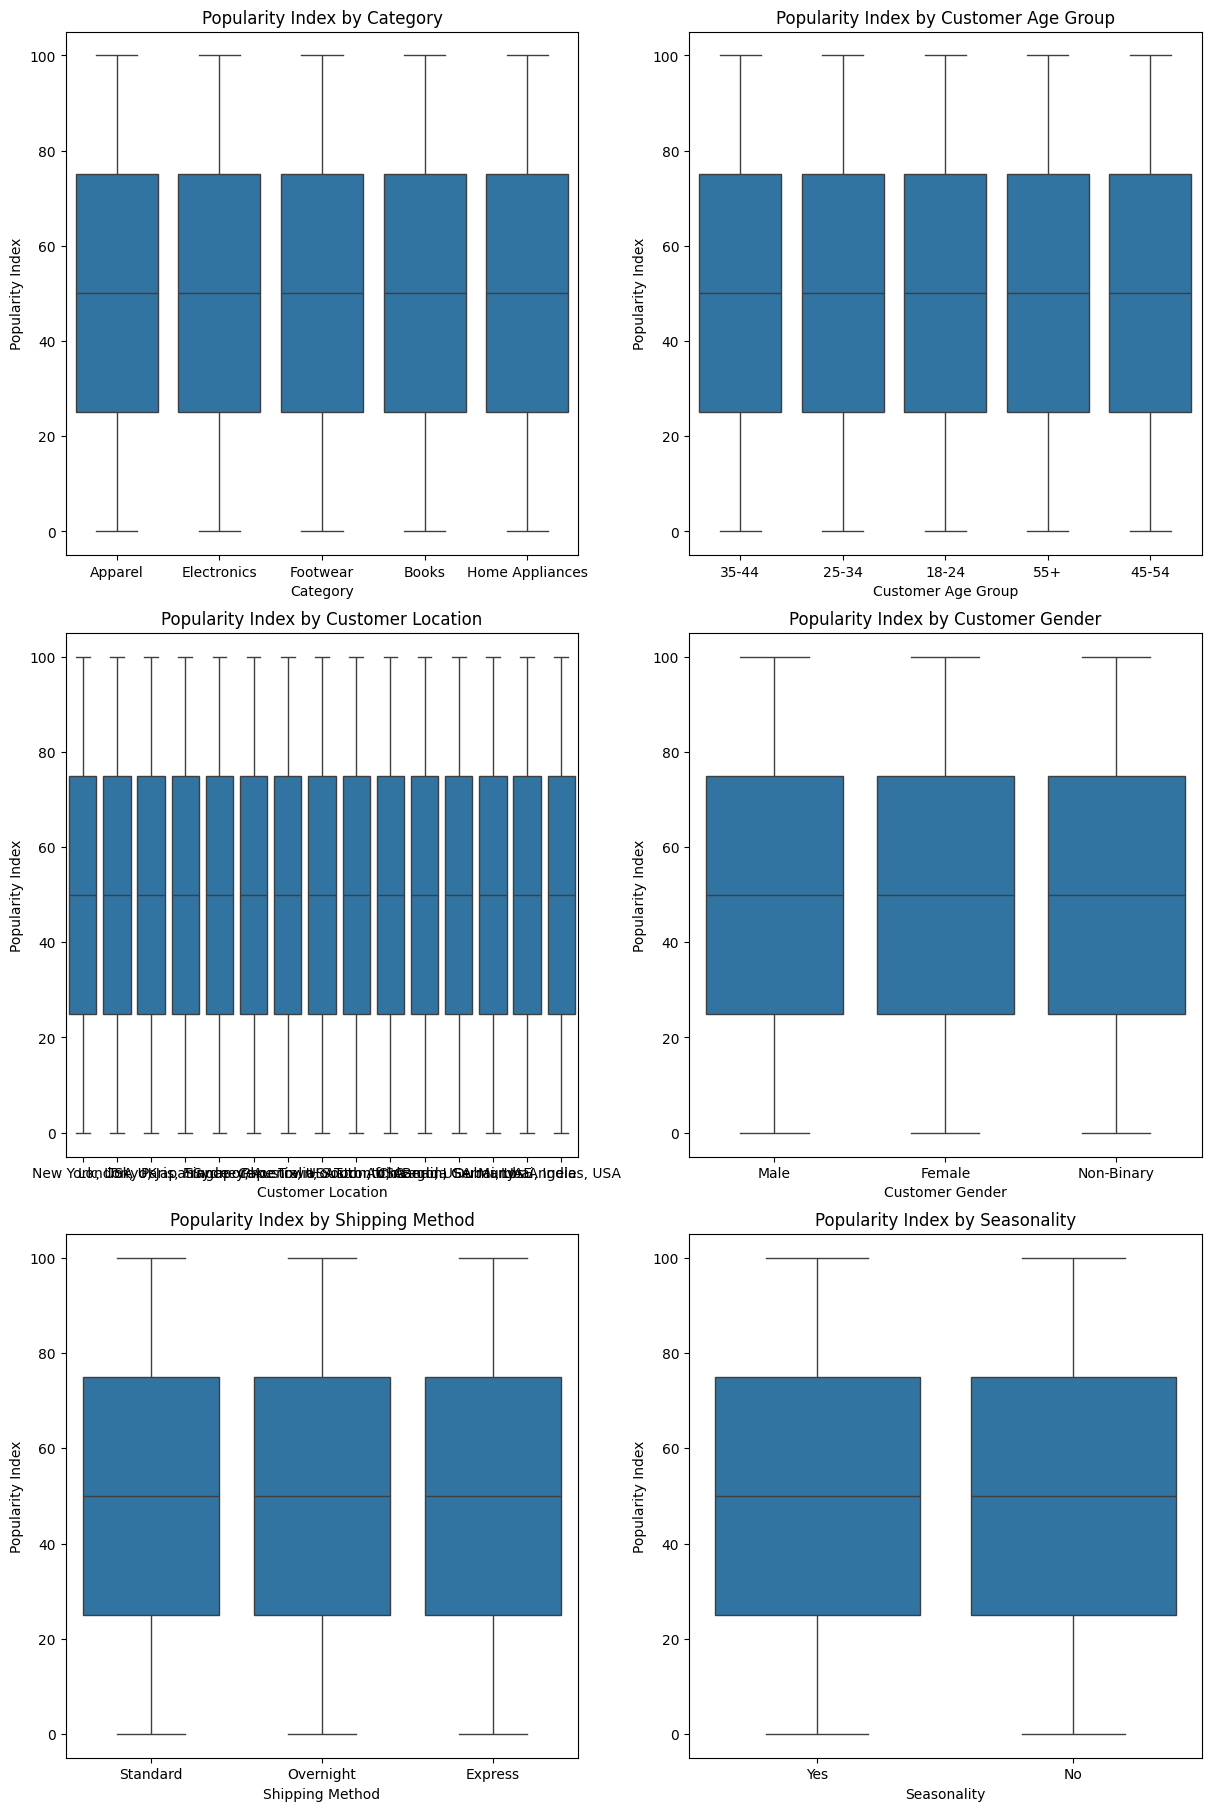

In [11]:
# 서브플롯 설정
num_plots = len(categorical_columns)
rows = (num_plots + 1) // 2  # 한 줄에 2개씩 표시할 때 필요한 행 개수
cols = 2  # 열 개수 고정
fig, axes = plt.subplots(rows, cols, figsize=(12, 6 * rows), constrained_layout=True)

# 각 범주형 변수에 대해 박스플롯 그리기
for i, col in enumerate(categorical_columns):
    row, col_idx = divmod(i, cols)  # 행과 열 인덱스 계산
    sns.boxplot(ax=axes[row, col_idx], x=data[col], y=data['Popularity Index'])
    axes[row, col_idx].set_title(f"Popularity Index by {col}")
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel("Popularity Index")

plt.show()

이상치 없음

In [12]:
# 수치형 변수 간의 상관관계 계산
correlation_matrix = data[numerical_columns].corr()
correlation_matrix

,Price,Discount,Tax Rate,Stock Level,Shipping Cost,Return Rate,Popularity Index
Price,1.000000,0.000137,-0.000357,0.000213,-0.001758,-0.000405,-0.000233
Discount,0.000137,1.000000,0.001209,0.000425,0.001071,0.000381,0.001250
Tax Rate,-0.000357,0.001209,1.000000,0.001220,-0.000610,-0.001154,0.000660
Stock Level,0.000213,0.000425,0.001220,1.000000,-0.000811,-0.000190,0.000303
Shipping Cost,-0.001758,0.001071,-0.000610,-0.000811,1.000000,-0.000090,0.000519
Return Rate,-0.000405,0.000381,-0.001154,-0.000190,-0.000090,1.000000,0.001648
Popularity Index,-0.000233,0.001250,0.000660,0.000303,0.000519,0.001648,1.000000


## 전처리

In [13]:
from sklearn.preprocessing import LabelEncoder

# Seasonality 컬럼만 Label Encoding
le = LabelEncoder()
data['Seasonality'] = le.fit_transform(data['Seasonality'])

# 나머지 범주형 변수는 더미 변수로 변환
categorical_columns = [col for col in data.select_dtypes(include=['object']).columns if col != 'Seasonality']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column                                     Non-Null Count    Dtype  
---  ------                                     --------------    -----  
 0   Price                                      1000000 non-null  float64
 1   Discount                                   1000000 non-null  int64  
 2   Tax Rate                                   1000000 non-null  int64  
 3   Stock Level                                1000000 non-null  int64  
 4   Shipping Cost                              1000000 non-null  float64
 5   Return Rate                                1000000 non-null  float64
 6   Seasonality                                1000000 non-null  int64  
 7   Popularity Index                           1000000 non-null  int64  
 8   Category_Books                             1000000 non-null  bool   
 9   Category_Electronics                       1000000 non-null  bool   


In [15]:
# Popularity Index와 상관관계를 가진 변수
data.corr()['Popularity Index'].abs().sort_values(ascending=False)

Popularity Index                             1.000000
Return Rate                                  0.001648
Category_Books                               0.001619
Customer Location_Dubai, UAE                 0.001568
Category_Electronics                         0.001563
Customer Gender_Non-Binary                   0.001525
Discount                                     0.001250
Customer Location_Tokyo, Japan               0.001154
Customer Location_Chicago, USA               0.000981
Customer Location_New York, USA              0.000967
Customer Location_Cape Town, South Africa    0.000866
Customer Age Group_35-44                     0.000751
Tax Rate                                     0.000660
Customer Age Group_45-54                     0.000622
Customer Location_Phoenix, USA               0.000596
Customer Location_Los Angeles, USA           0.000531
Shipping Cost                                0.000519
Customer Location_London, UK                 0.000447
Category_Home Appliances    

In [19]:
from sklearn.preprocessing import StandardScaler

# 표준화
numerical_columns = ['Price', 'Discount', 'Tax Rate', 'Stock Level', 'Shipping Cost', 'Return Rate']

scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# 표준화된 결과값 출력
def print_standardized_data(X_train, X_test):
    print("\n[Standardized X_train Data]")
    print(X_train[numerical_columns])
    print("\n[Standardized X_test Data]")
    print(X_test[numerical_columns])

# 표준화된 데이터 출력
print_standardized_data(X_train, X_test)


[Standardized X_train Data]
           Price  Discount  Tax Rate  Stock Level  Shipping Cost  Return Rate
566853 -1.035566 -1.465281  0.000019    -0.076892       0.621144     0.754520
382311  0.282000 -1.465281  0.586934     0.192605      -1.285791     1.283105
241519  0.772420  0.291246  0.586934    -1.189434      -1.071676     1.689568
719220  1.335134  0.291246 -0.586895     0.406822      -0.123059     0.719889
905718 -1.534531  0.876755  0.586934    -0.415492      -0.371127     0.787329
...          ...       ...       ...          ...            ...          ...
259178 -0.074410  0.291246  0.000019     0.510475      -0.793812     0.812847
365838  1.431203 -1.465281 -1.467267     0.406822      -0.590092     0.564959
131932 -1.558234 -0.294263  1.467306     0.102773      -0.497933    -1.520217
671155  0.338719  0.876755 -0.586895    -1.223985      -1.274704     1.689568
121958 -0.373163  0.291246  1.467306     1.056380      -1.598301     1.436212

[800000 rows x 6 columns]

[Standa

## 모델링

In [20]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Popularity Index'])
y = data['Popularity Index']

# 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [22]:
# 1. 선형 회귀 모델
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_preds)
lr_mae = mean_absolute_error(y_test, lr_preds)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lr_preds)
print("\n[Linear Regression]")
print(f"MSE: {lr_mse}")
print(f"MAE: {lr_mae}")
print(f"RMSE: {lr_rmse}")
print(f"R2: {lr_r2}")


[Linear Regression]
MSE: 850.2679354698059
MAE: 25.249701725339648
RMSE: 29.159354167570413
R2: -8.380787280160007e-05


In [23]:
# 2. Lasso 모델
lasso_model = Lasso(alpha=0.1, random_state=42)
lasso_model.fit(X_train, y_train)
lasso_preds = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_preds)
lasso_mae = mean_absolute_error(y_test, lasso_preds)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(y_test, lasso_preds)
print("\n[Lasso Regression]")
print(f"MSE: {lasso_mse}")
print(f"MAE: {lasso_mae}")
print(f"RMSE: {lasso_rmse}")
print(f"R2: {lasso_r2}")


[Lasso Regression]
MSE: 850.2158606963973
MAE: 25.248426806469727
RMSE: 29.15846121962538
R2: -2.2557606253581497e-05


In [26]:
# 3. 랜덤 포레스트 모델
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_preds)
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_preds)
print("\n[Random Forest Regressor]")
print(f"MSE: {rf_mse}")
print(f"MAE: {rf_mae}")
print(f"RMSE: {rf_rmse}")
print(f"R2: {rf_r2}")


[Random Forest Regressor]
MSE: 864.5247312774998
MAE: 25.384283850000003
RMSE: 29.402801418869934
R2: -0.01685262866991355


In [ ]:
# 4. Support Vector Regression (SVR) 모델
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train, y_train)
svr_preds = svr_model.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_preds)
svr_mae = mean_absolute_error(y_test, svr_preds)
svr_rmse = np.sqrt(svr_mse)
svr_r2 = r2_score(y_test, svr_preds)
print("\n[Support Vector Regression]")
print(f"MSE: {svr_mse}")
print(f"MAE: {svr_mae}")
print(f"RMSE: {svr_rmse}")
print(f"R2: {svr_r2}")

## 변수 중요도

In [24]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# 변수 중요도 계산
feature_importances = model.feature_importances_

# 변수 중요도를 데이터프레임으로 변환
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

'''
# 변수 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # 높은 중요도를 위로 표시
plt.show()
'''

"\n# 변수 중요도 시각화\nplt.figure(figsize=(10, 6))\nplt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')\nplt.xlabel('Importance')\nplt.ylabel('Feature')\nplt.title('Feature Importance')\nplt.gca().invert_yaxis()  # 높은 중요도를 위로 표시\nplt.show()\n"

In [25]:
print(importance_df)

                                      Feature  Importance
0                                       Price    0.168035
4                               Shipping Cost    0.162778
5                                 Return Rate    0.154950
3                                 Stock Level    0.143653
1                                    Discount    0.048691
2                                    Tax Rate    0.041633
6                                 Seasonality    0.016648
29                       Customer Gender_Male    0.014286
32                   Shipping Method_Standard    0.014257
31                  Shipping Method_Overnight    0.014015
30                 Customer Gender_Non-Binary    0.014009
12                   Customer Age Group_35-44    0.012305
9                           Category_Footwear    0.012113
11                   Customer Age Group_25-34    0.012009
14                     Customer Age Group_55+    0.011880
10                   Category_Home Appliances    0.011827
8             

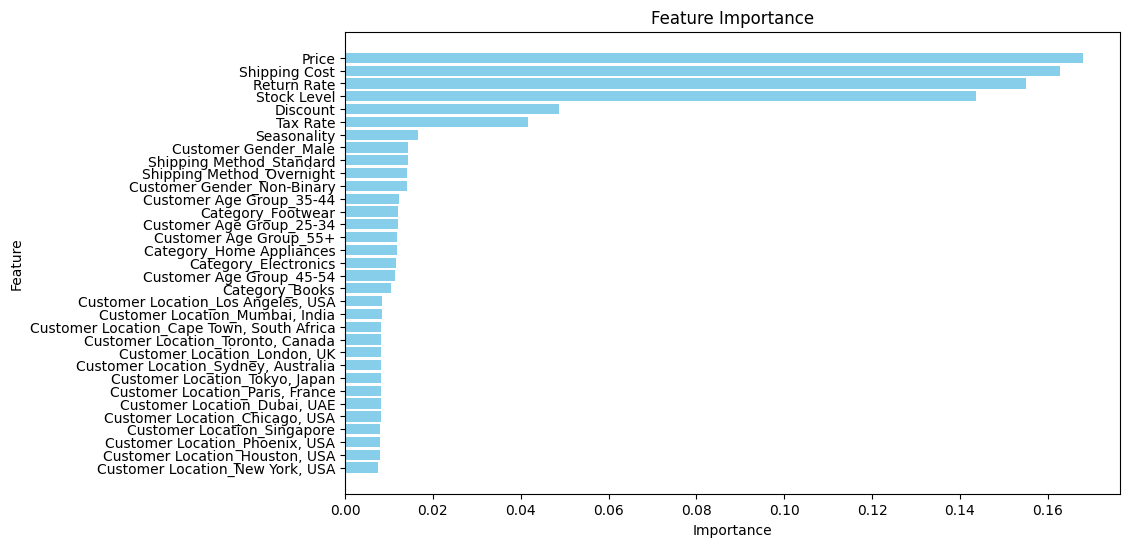

In [27]:
# 변수 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # 높은 중요도를 위로 표시
plt.show()